In [8]:
import pandas as  pd
data = pd.read_csv("E:/Downloads/fraud test.csv")

In [9]:
# Drop the 'Unnamed: 0' column
cleaned_data = data.drop(columns=['Unnamed: 0'])

# Display the first few rows of the cleaned dataset
print(cleaned_data)


       trans_date_trans_time        cc_num  \
0           21/06/2020 12:14  2.291160e+15   
1           21/06/2020 12:14  3.573030e+15   
2           21/06/2020 12:14  3.598220e+15   
3           21/06/2020 12:15  3.591920e+15   
4           21/06/2020 12:15  3.526830e+15   
...                      ...           ...   
555714      31/12/2020 23:59  3.056060e+13   
555715      31/12/2020 23:59  3.556610e+15   
555716      31/12/2020 23:59  6.011720e+15   
555717      31/12/2020 23:59  4.079770e+12   
555718      31/12/2020 23:59  4.170690e+15   

                                    merchant        category     amt    first  \
0                      fraud_Kirlin and Sons   personal_care    2.86     Jeff   
1                       fraud_Sporer-Keebler   personal_care   29.84   Joanne   
2       fraud_Swaniawski, Nitzsche and Welch  health_fitness   41.28   Ashley   
3                          fraud_Haley Group        misc_pos   60.05    Brian   
4                      fraud_Johnston-Casp

In [10]:
fraud_count = cleaned_data[cleaned_data["is_fraud"] == 1].shape[0]
print(fraud_count)


2145


In [11]:
# Split the dataset into a train and test set with 4000 for training and 2000 for testing
train_data = cleaned_data.sample(n=185239, random_state=42)
test_data = cleaned_data.drop(train_data.index).sample(n=370480, random_state=42)

# Show the sizes of the datasets to verify the split
train_data_size = train_data.shape[0]
test_data_size = test_data.shape[0]

(train_data_size, test_data_size)


(185239, 370480)

In [12]:
train_data.dtypes

trans_date_trans_time     object
cc_num                   float64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

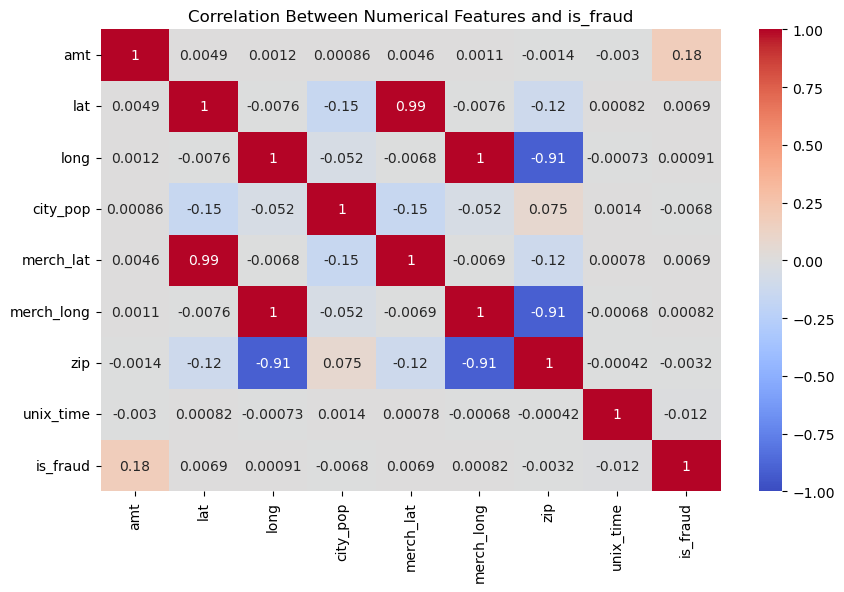

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns only
numerical_columns = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'zip', 'unix_time']

# Create a new dataframe with numerical columns and 'is_fraud' label
numerical_data = train_data[numerical_columns + ['is_fraud']]

# Calculate correlation matrix
correlation_matrix = numerical_data.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Between Numerical Features and is_fraud")
plt.show()


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    166072
           1       0.97      0.29      0.45       644

    accuracy                           1.00    166716
   macro avg       0.98      0.65      0.72    166716
weighted avg       1.00      1.00      1.00    166716

True Positives (TP): 188
True Negatives (TN): 166066
False Positives (FP): 6
False Negatives (FN): 456
Precision for fraud class (1): 0.9691
      Feature  Importance
0         amt    0.331950
7   unix_time    0.154702
5  merch_long    0.115882
4   merch_lat    0.112482
6         zip    0.072699
1         lat    0.072661
3    city_pop    0.071412
2        long    0.068212


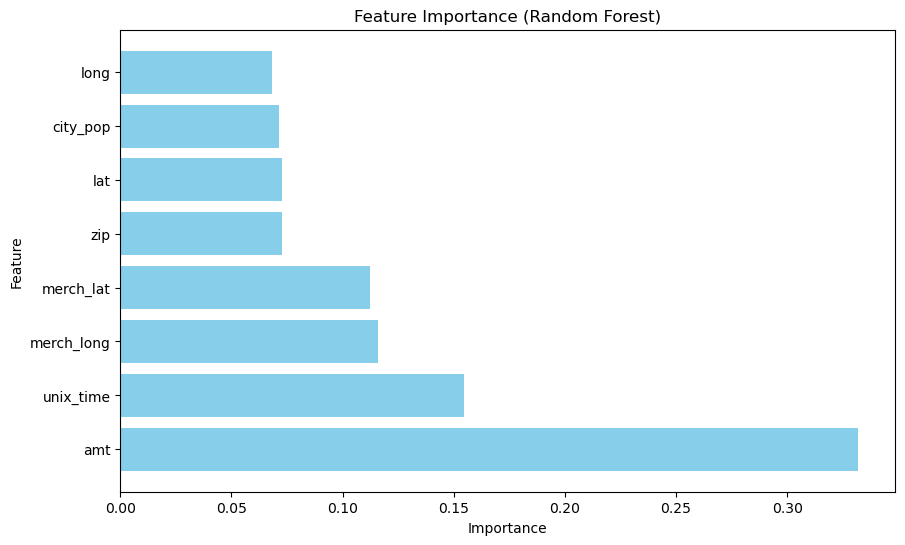

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_score
import pandas as pd
import matplotlib.pyplot as plt

# Select numerical features
numerical_columns = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'zip', 'unix_time']
X_numerical = cleaned_data[numerical_columns]
y = cleaned_data['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_numerical, y, test_size=0.3, stratify=y, random_state=42)

# Train the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict probabilities on the test set
y_prob = rf.predict_proba(X_test)[:, 1]

# Adjust the decision threshold to reduce false positives (set a higher threshold, e.g., 0.7)
threshold = 0.7
y_pred_custom = (y_prob >= threshold).astype(int)

# Print classification report with the custom threshold
print(classification_report(y_test, y_pred_custom))

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_custom)
TN, FP, FN, TP = conf_matrix.ravel()

print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

# Precision score to measure how many predicted fraud cases were correct
precision = precision_score(y_test, y_pred_custom, pos_label=1)
print(f'Precision for fraud class (1): {precision:.4f}')

# Feature Importance
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': numerical_columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print and visualize feature importance
print(feature_importance_df)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [16]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.sparse import hstack

# Load dataset and drop the 'Unnamed: 0' column
data = pd.read_csv("E:/Downloads/fraud test.csv")
cleaned_data = data.drop(columns=['Unnamed: 0'])

# Split the data into train and test sets
train_data = cleaned_data.sample(n=185239, random_state=42)
test_data = cleaned_data.drop(train_data.index).sample(n=370480, random_state=42)

# Object-type columns
object_cols = ['category', 'state', 'job', 'first', 'last', 'street', 'city', 'gender']

# 1. Apply TF-IDF Vectorization to all object type columns
tfidf_vectorizers = {}
X_train_tfidf = []
X_test_tfidf = []

# Apply TF-IDF for each object column separately
for col in object_cols:
    tfidf = TfidfVectorizer()
    tfidf_vectorizers[col] = tfidf
    # Fit and transform the train data
    X_train_col = tfidf.fit_transform(train_data[col].astype(str))
    X_test_col = tfidf.transform(test_data[col].astype(str))
    X_train_tfidf.append(X_train_col)
    X_test_tfidf.append(X_test_col)

# Combine all the TF-IDF features
X_train_tfidf_combined = hstack(X_train_tfidf)
X_test_tfidf_combined = hstack(X_test_tfidf)

# 2. Handling Numerical Columns (use directly)
numerical_cols = ['cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']

X_train_numerical = train_data[numerical_cols]
X_test_numerical = test_data[numerical_cols]

# 3. Combine the TF-IDF features with the numerical features
X_train_combined = hstack([X_train_tfidf_combined, X_train_numerical])
X_test_combined = hstack([X_test_tfidf_combined, X_test_numerical])

# 4. Define the target variable
y_train = train_data['is_fraud']
y_test = test_data['is_fraud']

# 5. Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_combined, y_train)

# 6. Make predictions and evaluate
y_pred = model.predict(X_test_combined)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [19]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from scipy.sparse import hstack

# Load dataset and drop the 'Unnamed: 0' column
data = pd.read_csv("E:/Downloads/fraud test.csv")
cleaned_data = data.drop(columns=['Unnamed: 0'])

# Split the data into train and test sets
train_data = cleaned_data.sample(n=185239, random_state=42)
test_data = cleaned_data.drop(train_data.index).sample(n=370480, random_state=42)

# Object-type columns
object_cols = ['category', 'state', 'job', 'first', 'last', 'street', 'city', 'gender']

# Fill missing values (NaN) with empty strings to avoid errors in TF-IDF
train_data[object_cols] = train_data[object_cols].fillna('')
test_data[object_cols] = test_data[object_cols].fillna('')

# 1. Apply TF-IDF Vectorization to text-heavy columns, use LabelEncoder for 'gender'
tfidf_vectorizers = {}
X_train_tfidf = []
X_test_tfidf = []

# Columns that might benefit from TF-IDF
tfidf_cols = ['category', 'state', 'job', 'first', 'last', 'street', 'city']

# Apply TF-IDF for each textual column
for col in tfidf_cols:
    tfidf = TfidfVectorizer(stop_words='english', min_df=2)  # Exclude too common and too rare words
    tfidf_vectorizers[col] = tfidf
    X_train_col = tfidf.fit_transform(train_data[col].astype(str))
    X_test_col = tfidf.transform(test_data[col].astype(str))
    X_train_tfidf.append(X_train_col)
    X_test_tfidf.append(X_test_col)

# For the 'gender' column, use Label Encoding since it has limited unique values
le = LabelEncoder()
X_train_gender = le.fit_transform(train_data['gender'])
X_test_gender = le.transform(test_data['gender'])

# Convert Label Encoded 'gender' to 2D to match other features
X_train_gender = X_train_gender.reshape(-1, 1)
X_test_gender = X_test_gender.reshape(-1, 1)

# Combine all the TF-IDF features
X_train_tfidf_combined = hstack(X_train_tfidf)
X_test_tfidf_combined = hstack(X_test_tfidf)

# 2. Handling Numerical Columns (use directly)
numerical_cols = ['cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']

X_train_numerical = train_data[numerical_cols]
X_test_numerical = test_data[numerical_cols]

# 3. Combine the TF-IDF features, Label Encoded 'gender', and the numerical features
X_train_combined = hstack([X_train_tfidf_combined, X_train_gender, X_train_numerical])
X_test_combined = hstack([X_test_tfidf_combined, X_test_gender, X_test_numerical])

# 4. Define the target variable
y_train = train_data['is_fraud']
y_test = test_data['is_fraud']

# 5. Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_combined, y_train)

# 6. Make predictions and evaluate
y_pred = model.predict(X_test_combined)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.9973
